## 1. Introducción
GOES-13, denominado en sus comienzos como GOES-N antes de volverse operativo, es un satélite meteorológico que forma parte del sistema GOES (Geostationary Operational Environmental Satellite) administrado por la NOAA (National Oceanic and Atmospheric Administration). El 14 de abril de 2010 paso a la fase operativa como GOES-E.

![title](http://www.nesdis.noaa.gov/news_archives/images/history_of_goes.png)

### Características principales de los canales del generador de imágenes de GOES-13

**1) Visible:** *0.52 a 0.71 µm, centrado en 0.63 µm*
- Posee una resolución espacial de 1 km en el nadir sobre el Ecuador.
- Sólo está disponible durante el día.
- Detecta la energía dispersada y reflejada (*albedo*).
- Detecta las nubes y la superficie terrestre.
- Detecta bruma, humo y polvo en las primeras y en las últimas horas del día.
- Es sensible a las diferencias entre el suelo, el agua y los tipos de nubes.

**2) IR Onda Corta:** *3.78 a 4.03 µm, centrado en 3.9 µm*
- Posee una resolución espacial de 4 km en el nadir sobre el Ecuador.
- Detecta tanto la radiación solar reflejada como la radiación térmica emitida por la Tierra.
- Presenta poca atenuación atmosférica.
- Percibe la superficie terrestre y las nubes.
- Debido a la radiación solar reflejada, los topes de las nubes y la superficie del suelo tienen un aspecto más cálido durante el día, en comparación con las imágenes del canal de la ventana infrarroja de onda larga de 10.7 µm.
- Permite detectar niebla y nubes de agua por la noche cuando se utiliza junto con el canal de la ventana infrarroja de onda larga (10.7µm).
- Permite distinguir entre las nubes de agua y de hielo de día basándose en la reflectividad solar.
- Ayuda a detectar la nieve y el hielo en las horas diurnas.

**3) Vapor de Agua:** *5.77 a 7.33 µm, centrado en 6.5 µm*
- Posee una resolución espacial de 4 km en el nadir sobre el Ecuador.
- Es muy sensible a la presencia de vapor de agua en la atmosférica.
- Muestra las variaciones de humedad en la troposfera superior.
- La estructura de las ondas atmosféricas es muy evidente; las ondas cortas son faciles de identificar.
- El seguimiento de las estructuras en las secuencias de imágenes de vapor de agua es útil para inferir los movimientos atmosféricos.

**4) IR Onda Larga:** *10.2 a 11.2 µm, centrado en 10.7 µm*
- Posee una resolución espacial de 4 km en el nadir sobre el Ecuador.
- Presenta poca atenuación atmosférica.
- Muestra las temperaturas de brillo de la superficie y de los topes de las nubes.
- Se usa para observar las estructuras nubosas a lo largo del tiempo y para estimar los movimientos atmosféricos.
- Se utiliza en combinación con el canal infrarrojo de onda corta de 3.9 µm para:
 - estimar la fase del agua en las nubes
 - detectar capas de niebla y estratos bajos
 - distinguir entre las nubes de agua y el manto de nieve
- Se utiliza en combinación con el canal de dioxido de carbono de 13.3 µm para:
 - estimar la humedad en niveles bajos
 - determinar la temperatura de la superficie del mar
 - detectar la ceniza volcánica

**5) Dióxido de Carbono (CO2):** *12.9 a 13.7 µm, centrado en 13.3 µm*
- Posee una resolución espacial de 8 km en el nadir sobre el Ecuador.
- Es sensible al dióxido de carbono, a las nubes y la superficie.
- Normalmente detecta nubes y la mitad inferior de la troposfera.
- Permite una mejor determinación del tope (altura/presion del tope) y la cobertura nubosa (producto mascara de nubes) y de los vientos que desplazan las nubes (vectores de movimiento atmosferico).


![title](GOES13_Imager_SRFs.png)

### Modelo conceptual de los canales

![title](mod_cmap.jpg)

![title](imager_channels.jpg)

## 2. Lectura de los datos
El objetivo de esta sección es familiarizarse con el modo de lectura de los archivos en formato binario (integer 16 bits) generados por una receptora GVAR a partir de la bajada de datos del sensor IMAGER a bordo del satélite geoestacionario GOES-13.

**Modulos necesarios:**
- Matplotlib: http://matplotlib.org/
- Numpy: http://www.numpy.org/
- Scipy: https://www.scipy.org/
- Skimage: http://scikit-image.org/

In [2]:
# Este comando "limpia" todas las variables definidas (equivalente a "clear all" de Matlab)
%reset_selective -f b

# Este comando le indica a Python que las figuras se deben generar dentro de la misma Notebook, no en una ventana
%matplotlib inline

# Importamos las librerias necesarias para trabajar
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np
import scipy.io as sio
from skimage import exposure
from funciones import read_goes_bin
from os import listdir

# Cargamos los mapas a utilizar
mapa = sio.loadmat('mapas.mat')

# Ruta donde se encuentran los archivos en formato binario (GOES_GVAR)
DataPath = './data/'

# Creamos una variable lista con todos los archivos contenidos en la carpeta
Filelist = listdir(DataPath)

# El archivo 0 corresponde al 16/6/2015 a las 03:35 UTC
# El archivo 1 corresponde al 13/9/2015 a las 17:38 UTC
nfile=1

# Extraemos fecha y hora de la imagen. Esto es util para luego poner en el titulo de la figura por ejemplo.
filename = Filelist[nfile]
year     = filename[0:2]
month    = filename[2:4]
day      = filename[4:6]
hour     = filename[7:9]
minute   = filename[9:11]

# Definimos los INPUTs de la función de lectura
filename = DataPath + Filelist[nfile]
nx=757
ny=698
dtype=np.int16

# Llamamos a la funcion de lectura
[data, latsat, lonsat] = read_goes_bin(filename,nx,ny,dtype)

# ¿Cómo saber las dimensiones de una matriz de datos?
data.shape
# En caso de tratarse de un archivo de una imagen diurna, la matriz contendra informacion de 5 canales.
# Caso contrario (escena nocturna) contendra datos de 4 canales (no esta el canal 1 VIS 0.63).

/home/vanina/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(757, 698, 4)

## 3. Exploración visual de los datos
El objetivo de esta sección es familiarizarse con el aspecto visual de las imágenes obtenidas por el radiómetro IMAGER a bordo del satálite GOES-13 en sus distintas bandas dentro del espectro electromagnético.

/home/luciano/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:584: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


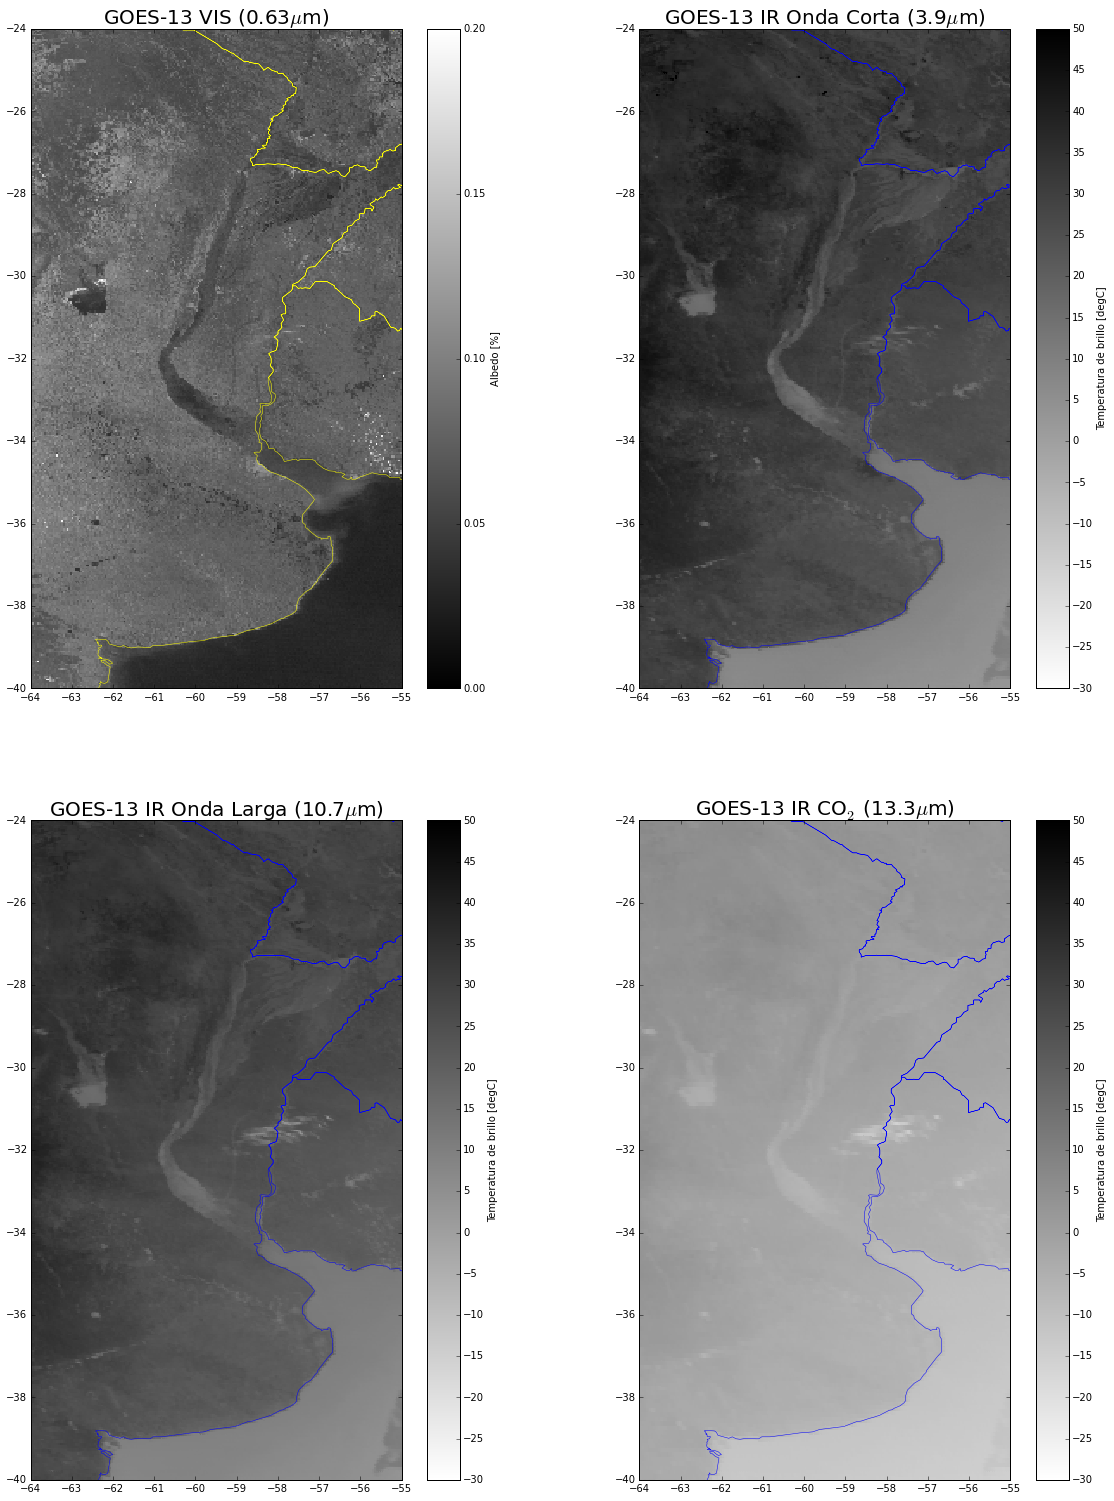

In [6]:
# Definimos los limites del area a visualizar
latn=-24
lats=-40
lonw=-64
lone=-55

aspect_ratio=1

fig = plt.figure(figsize=(20, 26))

#==================================================================================================#
# Imagen Visible (0.63)
#==================================================================================================#

ax1 = fig.add_subplot(221,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,0]/100,cmap='gray', vmin=0,vmax=0.2)
cbar_labels = np.arange(0.,0.21,0.05)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Albedo [%]')
#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Yellow', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 VIS (0.63$\mu$m)', fontsize=20)

#==================================================================================================#
# Imagen IR Onda Corta (3.9)
#==================================================================================================#

ax1 = fig.add_subplot(222,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,1],cmap='gray_r', vmin=-30,vmax=50)
cbar_labels = np.arange(-30.,50.1,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Temperatura de brillo [degC]')

#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 IR Onda Corta (3.9$\mu$m)', fontsize=20)

#==================================================================================================#
# Imagen IR Onda Larga (10.7)
#==================================================================================================#

ax1 = fig.add_subplot(223,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,3],cmap='gray_r', vmin=-30,vmax=50)
cbar_labels = np.arange(-30.,50.1,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Temperatura de brillo [degC]')

#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 IR Onda Larga (10.7$\mu$m)', fontsize=20)

#==================================================================================================#
# Imagen IR CO2 (13.3)
#==================================================================================================#

ax1 = fig.add_subplot(224,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,4],cmap='gray_r', vmin=-30,vmax=50)
cbar_labels = np.arange(-30.,50.1,5.)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Temperatura de brillo [degC]')

#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Blue', linewidth=0.5)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 IR CO$_2$ (13.3$\mu$m)', fontsize=20)

#==================================================================================================#

#plt.savefig('./GOES13_VIS_'+year+month+day+'T'+hour+minute+'Z.png',dpi=100,transparent=False)

plt.show()

## 4. Exploración numérica de las bandas
El objetivo de esta sección es familiarizarse con la generación de recortes de una escena completa, obtención de histogramas, diagramas de dispersion y estadisticos a partir de las imágenes correspondientes a cada canal del sensor Imager del satelite GOES-13.

### 4.1 Obtención de un recorte de la escena completa
Ahora vamos a generar un recorte (*subset*) de la escena para analizar con detalle y numéricamente la respuesta de las diferentes superficies en cada una de las bandas, mediante diagramas de dispersión e histogramas.

In [1]:
# Definimos los limites del area a recortar:
latmin=-40
latmax=-24
lonmin=-64
lonmax=-55

# Generamos el recorte para cada una de las bandas o canales:

idx = (latsat>=latmin) & (latsat<=latmax) & (lonsat>=lonmin) & (lonsat<=lonmax)

sub_lat = latsat[:,:][idx]
sub_lon = lonsat[:,:][idx]

# Canal 1 VIS 0.63
sub_ch1 = data[:,:,0][idx]

# Canal 2 IR Onda Corta 3.9
sub_ch2 = data[:,:,1][idx]

# Canal 3 Vapor de Agua 6.5
sub_ch3 = data[:,:,2][idx]

# Canal 4 IR Onda Larga 10.7
sub_ch4 = data[:,:,3][idx]

# Canal 6 CO2 13.3
sub_ch6 = data[:,:,4][idx]

NameError: name 'latsat' is not defined

### 4.2 Graficado de diagramas de dispersión (*scatterplots*) 

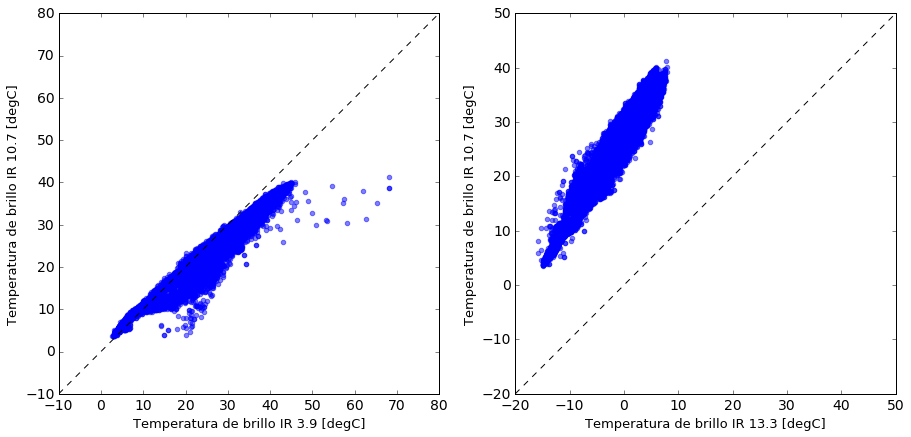

In [8]:
fig = plt.figure(figsize=(15, 7))

#=============================================================================================#

fig.add_subplot(121,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

# Graficamos el scatterplot, en este caso, entre Canal 2 (3.9) y Canal 4 (10.7)
plt.scatter(sub_ch2, sub_ch4, color='b', marker='o', alpha=0.5)

# Definimos los limites de los ejes X e Y respectivamente
plt.xlim([-10, 80])
plt.ylim([-10, 80])

# Definimos los titulos de los ejes X e Y respectivamente
plt.xlabel('Temperatura de brillo IR 3.9 [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo IR 10.7 [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-10, 80), (-10, 80), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

fig.add_subplot(122,aspect=1)

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

# Graficamos el scatterplot, en este caso, entre Canal 6 (13.3) y Canal 4 (10.7)
plt.scatter(sub_ch6, sub_ch4, color='b', marker='o', alpha=0.5)

# Definimos los limites de los ejes X e Y respectivamente
plt.xlim([-20, 50])
plt.ylim([-20, 50])

# Definimos los titulos de los ejes X e Y respectivamente
plt.xlabel('Temperatura de brillo IR 13.3 [degC]',fontsize=13)
plt.ylabel('Temperatura de brillo IR 10.7 [degC]',fontsize=13)

# Linea arbitraria entre dos puntos
plt.plot((-20, 50), (-20, 50), linewidth=1.0, color='k', linestyle='--')

#=============================================================================================#

# En caso de querer guardar la image, borren el # que esta delante de la siguiente linea de codigo y ponganle el
# nombre que quieran asi como la resolucion.
#plt.savefig('./scatterplot.png',dpi=100,transparent=False)

plt.show()

### 4.3 Cálculo y graficado de histogramas 

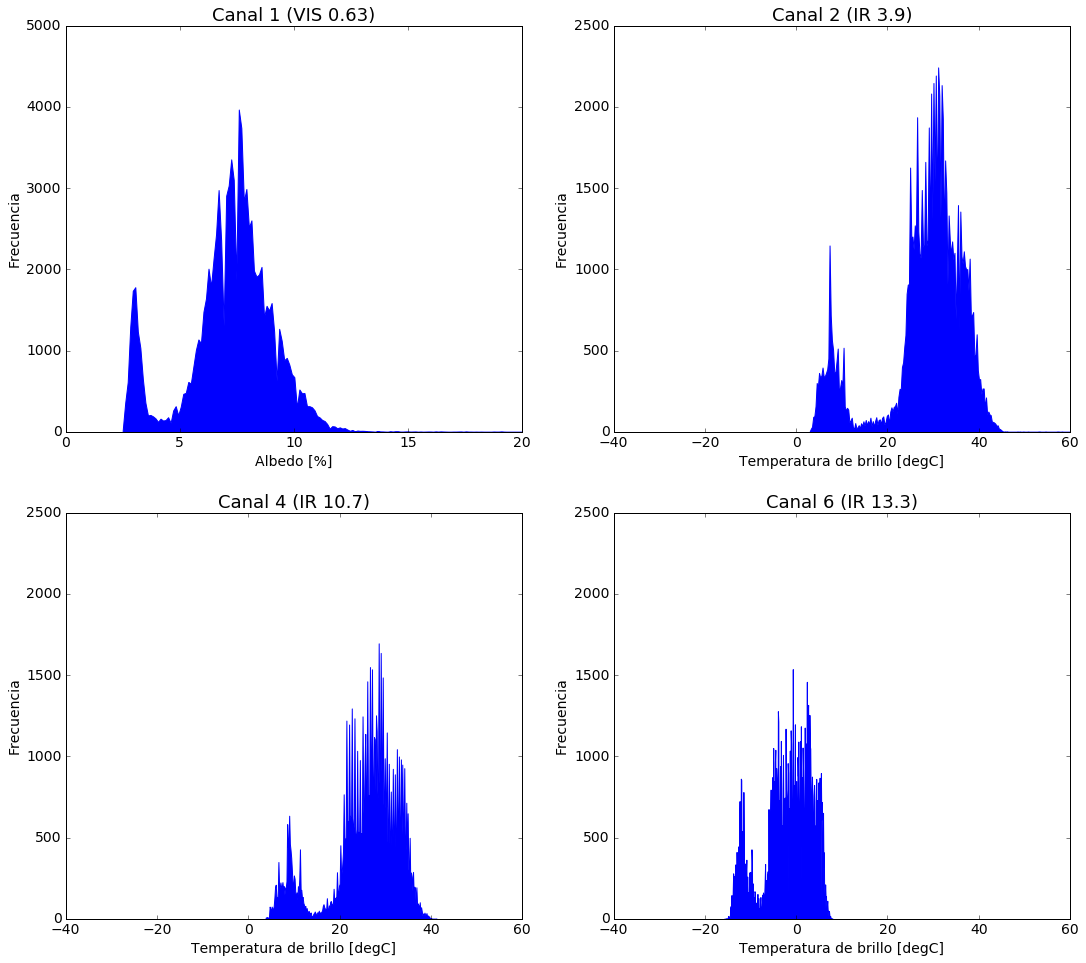

In [84]:
# CALCULAMOS EL HISTOGRAMA PARA CADA BANDA O CANAL

# Aca usamos el metodo "histogram" del submodulo "exposure" de la libreria "skimage".
# Documentacion: http://scikit-image.org/docs/dev/api/skimage.exposure.html

counts1, centers1 = exposure.histogram(sub_ch1,nbins=256)
counts2, centers2 = exposure.histogram(sub_ch2,nbins=256)
counts3, centers3 = exposure.histogram(sub_ch3,nbins=256)
counts4, centers4 = exposure.histogram(sub_ch4,nbins=256)
counts6, centers6 = exposure.histogram(sub_ch6,nbins=256)


# GRAFICAMOS LOS HISTOGRAMAS

fig = plt.figure(figsize=(18, 16))
fig.set_facecolor('white')

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

fig.add_subplot(221)
plt.fill_between(centers1[1::], counts1[1::], color='b', alpha=1.0)
plt.xlabel('Albedo [%]',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)
plt.xlim([0, 20])
plt.ylim([0, 5000])
plt.title('Canal 1 (VIS 0.63)',fontsize=18)

fig.add_subplot(222)
plt.fill_between(centers2[1::], counts2[1::], color='b', alpha=1.0)
plt.xlabel('Temperatura de brillo [degC]',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)
plt.xlim([-40, 60])
plt.ylim([0, 2500])
plt.title('Canal 2 (IR 3.9)',fontsize=18)

fig.add_subplot(223)
plt.fill_between(centers4[1::], counts4[1::], color='b', alpha=1.0)
plt.xlabel('Temperatura de brillo [degC]',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)
plt.xlim([-40, 60])
plt.ylim([0, 2500])
plt.title('Canal 4 (IR 10.7)',fontsize=18)

fig.add_subplot(224)
plt.fill_between(centers6[1::], counts6[1::], color='b', alpha=1.0)
plt.xlabel('Temperatura de brillo [degC]',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)
plt.xlim([-40, 60])
plt.ylim([0, 2500])
plt.title('Canal 6 (IR 13.3)',fontsize=18)

#plt.savefig('./histogramas.png',dpi=100,transparent=False)

plt.show()

### 4.4 Identificación visual a partir de análisis de histogramas 

Quiero marcar o destacar en la imagen correspondiente al canal 1 (VIS 0.63) todos aquellos pixeles que cumplen con una cierta condición, por ejemplo, que su temperatura de brillo en el canal 4 (IR de onda larga 10.7) es menor que 15°C.

In [ ]:
# IDENTIFICAMOS LOS PUNTOS DE INTERES Y GENERAMOS UN SUBCONJUNTO A PARTIR DE APLICAR UNA O VARIAS CONDICION/ES
# A LA TEMPERATURA DE BRILLO

# Defino los umbrales de TB a aplicar
tbthr1=15.0
tbthr2=20.0

# Defino un primer conjunto de puntos donde la TB de IR onda larga (10.7) es menor o igual que "tbtrh1"
latreg1 = sub_lat[np.where(sub_ch4<=tbthr1)]
lonreg1 = sub_lon[np.where(sub_ch4<=tbthr1)]

# Defino un segundo conjunto de puntos donde la TB de IR onda larga (10.7) es mayor estricto que "tbtrh1"
# y menor o igual que "tbtrh2"
latreg2 = sub_lat[np.where((sub_ch4>tbthr1) & (sub_ch4<=tbthr2))]
lonreg2 = sub_lon[np.where((sub_ch4>tbthr1) & (sub_ch4<=tbthr2))]    

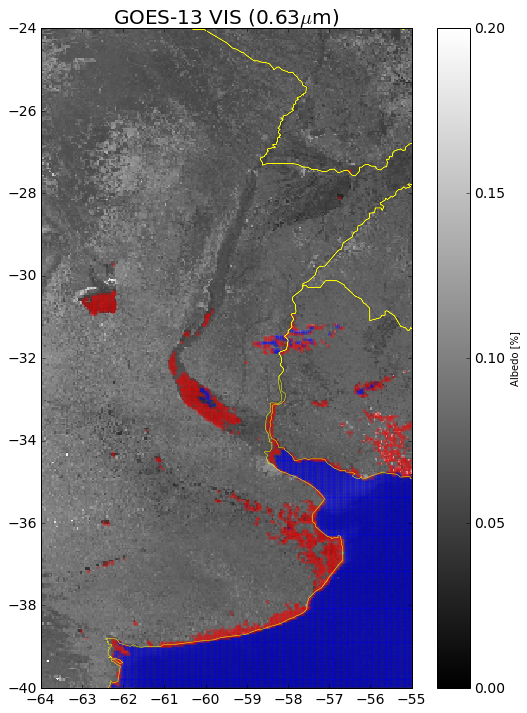

In [158]:
# GRAFICAMOS LOS RESULTADOS

# Definimos los limites del area a visualizar
latn=-24
lats=-40
lonw=-64
lone=-55

aspect_ratio=1

fig = plt.figure(figsize=(20, 26))

ax1 = fig.add_subplot(221,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,0]/100,cmap='gray', vmin=0,vmax=0.2)
cbar_labels = np.arange(0.,0.21,0.05)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Albedo [%]')

#plt.plot(mapa['provincias'][:,0],mapa['provincias'][:,1],color='Blue', linewidth=0.5)
plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Yellow', linewidth=0.5)

plt.scatter(lonreg1, latreg1, color='b', marker='.', alpha=0.2)
plt.scatter(lonreg2, latreg2, color='r', marker='.', alpha=0.2)

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 VIS (0.63$\mu$m)', fontsize=20)

plt.show()


### 4.5 Análisis sobre transectas

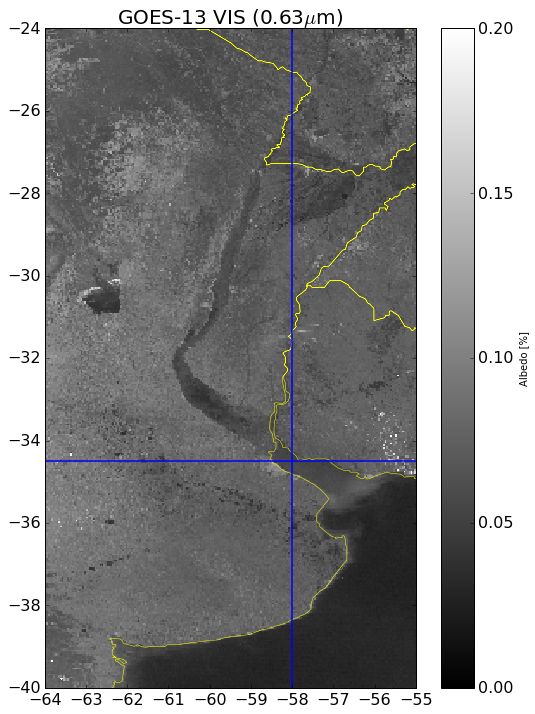

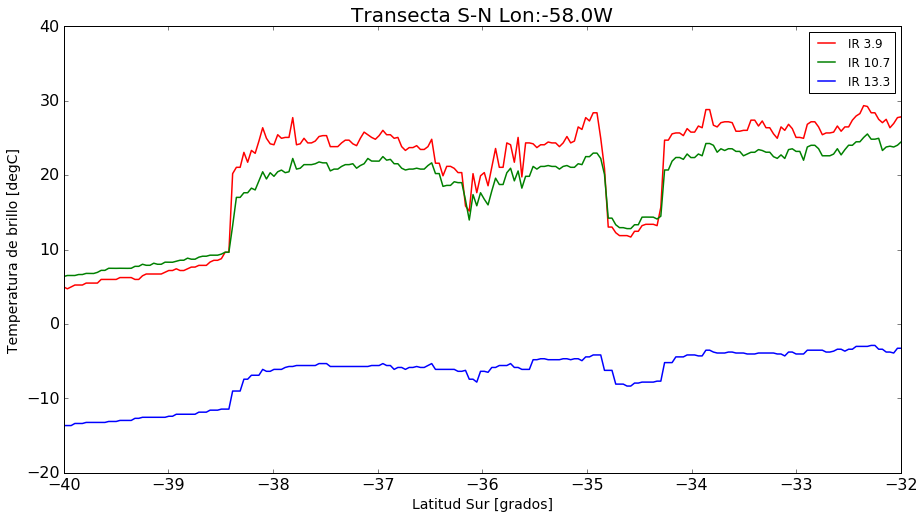

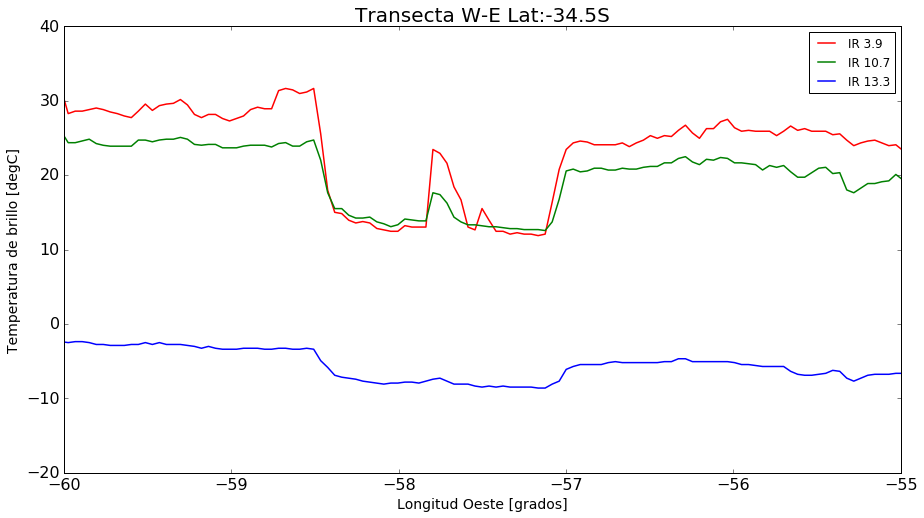

In [281]:
# Transecta Norte-Sur
lontran=-58.0
XX01 = latsat[np.where( (lonsat>lontran-0.005) & (lonsat<lontran+0.005) )]
YY11 = data[:,:,1][np.where( (lonsat>lontran-0.005) & (lonsat<lontran+0.005) )] # IR 3.9
YY12 = data[:,:,2][np.where( (lonsat>lontran-0.005) & (lonsat<lontran+0.005) )] # WV 6.5
YY13 = data[:,:,3][np.where( (lonsat>lontran-0.005) & (lonsat<lontran+0.005) )] # IR 10.7
YY14 = data[:,:,4][np.where( (lonsat>lontran-0.005) & (lonsat<lontran+0.005) )] # CO2 13.3

# Transecta Oeste-Este
lattran=-34.5
XX02 = lonsat[np.where( (latsat>lattran-0.018) & (latsat<lattran+0.018) )]
YY21 = data[:,:,1][np.where( (latsat>lattran-0.018) & (latsat<lattran+0.018) )] # IR 3.9
YY22 = data[:,:,2][np.where( (latsat>lattran-0.018) & (latsat<lattran+0.018) )] # WV 6.5
YY23 = data[:,:,3][np.where( (latsat>lattran-0.018) & (latsat<lattran+0.018) )] # IR 10.7
YY24 = data[:,:,4][np.where( (latsat>lattran-0.018) & (latsat<lattran+0.018) )] # CO2 13.3

#====================================================================================================#

# Imagen VIS de referencia para mostrar donde se estan haciendo las transectas

# Definimos los limites del area a visualizar
latn=-24
lats=-40
lonw=-64
lone=-55

aspect_ratio=1

fig = plt.figure(figsize=(20, 26))

ax1 = fig.add_subplot(221,aspect=aspect_ratio)

imgplot=plt.pcolormesh(lonsat,latsat,data[:,:,0]/100,cmap='gray', vmin=0,vmax=0.2)
cbar_labels = np.arange(0.,0.21,0.05)
cbar=plt.colorbar(imgplot, orientation='vertical',ticks = cbar_labels)
cbar.set_label('Albedo [%]')

plt.plot(mapa['samerica'][:,0],mapa['samerica'][:,1],color='Yellow', linewidth=0.5)

# Linea transecta vertical (N-S)
plt.axvline(x=lontran, linewidth=1.5, color='b')

# Linea transecta horizontal (W-E)
plt.axhline(y=lattran, linewidth=1.5, color='b')

plt.axis([lonw, lone, lats, latn])
plt.title('GOES-13 VIS (0.63$\mu$m)', fontsize=20)

plt.show()

#====================================================================================================#

# Grafico transecta SUR-NORTE

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(111)

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

plt.plot(XX01, YY11, linewidth=1.5, color='r', linestyle='-', label='IR 3.9')
plt.plot(XX01, YY13, linewidth=1.5, color='g', linestyle='-', label='IR 10.7')
plt.plot(XX01, YY14, linewidth=1.5, color='b', linestyle='-', label='IR 13.3')

plt.legend()

plt.axis([-40, -32, -20, 40])

plt.xlabel('Latitud Sur [grados]', fontsize=14)
plt.ylabel('Temperatura de brillo [degC]', fontsize=14)
plt.title('Transecta S-N Lon:'+str(lontran)+'W', fontsize=20)

plt.show()

#====================================================================================================#

# Grafico transecta SUR-NORTE

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(111)

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

plt.plot(XX02, YY21, linewidth=1.5, color='r', linestyle='-', label='IR 3.9')
plt.plot(XX02, YY23, linewidth=1.5, color='g', linestyle='-', label='IR 10.7')
plt.plot(XX02, YY24, linewidth=1.5, color='b', linestyle='-', label='IR 13.3')

plt.legend()

plt.axis([-60, -55, -20, 40])

plt.xlabel('Longitud Oeste [grados]', fontsize=14)
plt.ylabel('Temperatura de brillo [degC]', fontsize=14)
plt.title('Transecta W-E Lat:'+str(lattran)+'S', fontsize=20)

plt.show()
